## Imports

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score

## Linear Regression

### What is linear regression ?

It is the mathematical method of drawing a best fit line between two features and perform predictions by plotting them on the line

### How can we determine the best fit line ?

The best fit line is determined by the line that has less value for sum of squared residuals
1. The reason for squaring the residuals(difference between the actual point and the point on the line) is to avoid cancelling the postive values with the negative values
2. The line with least sum of square of residulas is determined with the help of plotting a graph based on each rotation
3. The slope will be determined by the optimal line

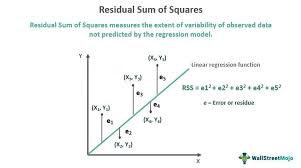

### Steps to find the best fit line

![image](https://miro.medium.com/v2/resize:fit:1400/1*EJhi1ERW-Ay6uTA_AhxlNQ.png)

1. Draw a horizontal line on y-axis at the mean values of y
2. Calculate the sum of squared distances
3. Rotate the line a little bit and calculate the sum of squared residuals
4. Keep on rotating the line until you get good number of sum of squared residuals
5. Plot the outcomes in the form of graph (X - axis line rotation | Y - axis the values of sum of squared residulas)

### Outcome of the process

We can be able to find the slope and the intercept of the line(best fit line)
1. The below example is the python implementation
2. _coeff is known as slope(One slope per feature)
3. intercept will give us the y-intercept

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
print(X, y)

[[1 1]
 [1 2]
 [2 2]
 [2 3]] [ 6  8  9 11]


In [12]:
reg = LinearRegression().fit(X, y)
print("R2 Score", reg.score(X, y))
print("Coefficients",reg.coef_)
print("Intercept",reg.intercept_)
print("Predict values",reg.predict(np.array([[3, 5]])))

R2 Score 1.0
Coefficients [1. 2.]
Intercept 3.0000000000000018
Predict values [16.]


### Regular R

1. The value of regular R ranges from -1 to 1 and they are correlated(either postively or negatively)
2. Values to 0 are lame

### Why do we need R2 when R(Regular R) is in place ?

1. It is very similar to R
2. It will be very easy to interpret
3. Like, its not obvious to say R value 0.7 is twice as good as R value 0.5
4. However, we can say R2 0.7 is 1.4 as good as R2 0.5
5. It is easy and intuitive to calculate

### Interpret R2 Value

1. Usually when someone asks about the weight of the mouse in average, we calculate the average and tell them
2. Instead, there is a better way to the weight of the mouse even with better accuracy which is R2
3. With the help of R2 value, we can say how much it is better from the mean
4. The value of R2 is between 0 and 1 because it divides the sum of squares of variation in mean - the sum of squares of variation in line by the sum of squares of variation in mean
5. If the value of R2 is 0.81(81%), there is 81% reduction in variation from the value calculated through the variation in mean
6. In other words, the size/weight relationship accounts for 81% of variation
7. This means the most of the variation of the data is explained by size/weight relationship

### Calculate R2 (R-Square)

1. R2 is the percentage of the variation explained by the two variable/features
2. The relationship between R and R2 is that its just the square of R
3. This is our first step to determine how good the guess(prediction) be
4. It is the metric for correlating the features
5. The R2 value is calculated with the help of average sum of squares of variance of line and average sum of squares of variance around the mean
6. The value of R2 is from 0 to 1

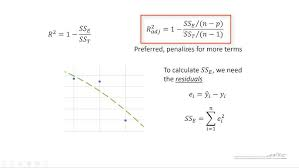

Taking Mouse example from [Statquest](https://www.youtube.com/watch?v=nk2CQITm_eo&list=PLblh5JKOoLUIzaEkCLIUxQFjPIlapw8nU&index=2&t=240s)

1. The R2 value 0.6 is nothing but 60%
2. In other words, we can say that the mouse weight explains 60% of the variance in mouse size
3. In another words, we can say that there is 60% reduction in variance when we take mouse weight into account

### Values of R

1. The more the parameters(features), the higher the R value
2. For example, the equation y = 0.3 + mouse_size + flip_a_coin + favorite_color + astrologer_sign will never make the SS(fit) worse than the equation with lower parameters i.e. y = 0.3 + mouse_size
3. If the feature's SS(fit) does not make smaller, least squares will ignore it by making the parameter 0 i.e y = 0.3 + 5.6 mouse_weight + 0 * tail_length
4. As a result, equations with more parameters will never make SS(fit) worse than equations with less parameters
5. However, due to random chance, there may be some probability that small mice in the dataset might get heads more frequently than large mice
6. If this happens, we will get smaller SS(fit) and better R2
7. In this kind of scenario, we calculate adjusted R2 where we limit the number of parameters

### Adjusted R2

1. The adjusted R2 helps us limit the ways it calculates the R2 with the help of number of parameters
2. In some cases, the R2 gives 100% but that's not statistically significant because the SS on two points no matter the line of the direction will give us 100% confidence but it is not
3. Hence we need p-value
4. The p-value from R2 comes from something called F
5. F = (Variation in Mouse size by taking mouse weight into account / Variation in Mouse size without taking mouse weight into account)

![Adjusted R2 Formula](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQb5ArYtT0W44E-lsm4wdOHNKYBakF7Hy9LUg&s)

### Python Implementation for R2

In [4]:
hnw = pd.read_csv("datasets/height_weight.csv")

In [5]:
hnw.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


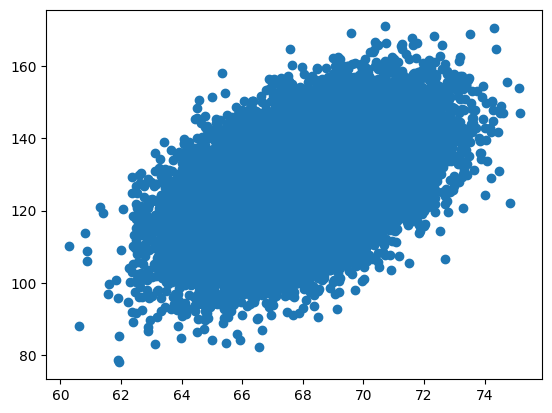

In [7]:
plt.scatter(hnw["Height(Inches)"], hnw["Weight(Pounds)"])

In [50]:
hnw_reg = LinearRegression()
X_train, Y_train, x_test, y_test = train_test_split(hnw[["Height(Inches)"]], hnw[["Weight(Pounds)"]])

In [42]:
Y_train

,Height(Inches)
1022,66.54306
12004,67.39237
644,66.13469
5694,68.20921
6502,67.02379
...,...
23028,67.81254
22251,68.15606
24148,67.96735
16339,70.55462


In [51]:
hnw_reg.fit(X_train, x_test)

LinearRegression()

In [54]:
print("Slope", hnw_reg.coef_)
print("Intercept", hnw_reg.intercept_)

Slope [[3.0470147]]
Intercept [-80.11198154]


In [57]:
y_pred = hnw_reg.predict(Y_train)

In [63]:
print("r2_score from metrics", r2_score(y_test, y_pred))
print("r2 score from regression object", hnw_reg.score(X_train, x_test))

r2_score from metrics 0.26649655390271565
r2 score from regression object 0.24826165699625946
